## Lab1 (continued) - Working with Jupyter Notebooks in IBM Watson Studio
In this notebook, we will conduct some early exploratory analysis on the `GoSales_Tx.csv` data file.

Tips:
* Code cells are identifiable by their `In [ ]:` prefix in the margin
* To execute the cells in the notebook, select the cell and click the **Run** button, or hit **Ctrl-Enter**.
* Cells which have not been executed before will have empty brackets, while executed cells will have a sequence number within, e.g. `In [13]`
* Cell execution result displays below the cell
* To clear all exection statuses and outputs, use the `Cell/All Output/Clear` menu.

### Getting started:
* Select the code cell below, and **delete all its content**
* Open the data panel on the right using the    
`10`   
`01` button icon  (top right)
* From the data panel on the right use context menu on `GoSales_Tx.csv` file to _Insert to code/Insert pandas DataFrame_

The python source code to create a `df_data_1` panda DataFrame that accesses the `GoSales_Tx.csv` file is generated.
>NOTE: If the name is different, change the variable name back to `df_data_1`

Then execute the cell (Ctrl-Enter or run button), upon completion, a subset of the data will be shown below the code cell.

In [3]:
# import types
# import pandas as pd
# from botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0

# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share your notebook.
# client_70ab70feb7fb4d8f9a47a408afd9f30f = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='ZATI1oq_TlsWqN-oEz3Wo1IPXWwOkCx0PXV3gj0d5eui',
#     ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# body = client_70ab70feb7fb4d8f9a47a408afd9f30f.get_object(Bucket='watstudworkshop-donotdelete-pr-basx79wonvxlys',Key='GoSales_Tx.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# df_data_1 = pd.read_csv(body)
# df_data_1.head()

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired


At this stage, the dataframe should be loaded and the 5 first rows displayed.  
The following cell checks that no mistake has been made in the variable naming as `df_data_1`, and creates a convenience shortcut variable `df` for the `DataFrame`

In [4]:
if 'df_data_2' in globals().keys():
    df_data_1=df_data_2
if not 'df_data_1' in globals().keys():
    print("***************\nERROR: df_data_1 variable is not defined, please check the cell above\n***************")
else:
    # Created a convenience shortcut variable
    df=df_data_1

## Extract some facts about the dataset

In the following section, we will start using `Pandas` functions to query information about the data represented in the CSV file which was just loaded in a `DataFrame`

#### Finding out about data types
The first thing we will want to know besides the column titles, is the data types of the columns.   
For this we use the `DataFrame`'s `dtypes` attribute. The data types have been inferred when loading the CSV file, in this case we can see that:
* `IS_TENT` has been identified as a boolean
* `AGE` has been inferred as an integer
* `GENDER`, `MARITAL_STATUS`, `PROFESSION` are strings which match the generic `object` type.
Note that the types themselves are instances of `numpy` data types and are returned in a `Series` object indexed by column name.

In [5]:
df.dtypes

IS_TENT             bool
GENDER            object
AGE                int64
MARITAL_STATUS    object
PROFESSION        object
dtype: object

#### Counting full rows
* We'll use the DataFramce `count()` method to compute non-empty rows for each column in the next code cell

In this dataset we should find 60252 data rows for each of the columns, which means that the table has no hollows cells.

In [6]:
import numpy as np
df.count()

IS_TENT           60252
GENDER            60252
AGE               60252
MARITAL_STATUS    60252
PROFESSION        60252
dtype: int64

## Gettings base statistics
* Use `describe()` to get statistics on fields:
    * The numeric `AGE` confirms the average age is about 34 yo.
    * There are 9 unique `PROFESSION` of which the top is 'Other', and 3 `MARITAL_STATUS` of which the top is 'Married'

In [7]:
df.describe(include='all')

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
count,60252,60252,60252.000000,60252,60252
unique,2,2,NaN,3,9
top,False,M,NaN,Married,Other
freq,54241,31352,NaN,30779,24503
mean,NaN,NaN,34.187479,NaN,NaN
std,NaN,NaN,10.105477,NaN,NaN
min,NaN,NaN,17.000000,NaN,NaN
25%,NaN,NaN,26.000000,NaN,NaN
50%,NaN,NaN,33.000000,NaN,NaN
75%,NaN,NaN,41.000000,NaN,NaN


#### Investigate frequency of buying behavior
* Now we would want to know the proportion of positive buying decisions vs total number of records, so we count the number of each values (here, just boolean True/False) of the **IS_TENT** column:

>NOTE: in terms of notation, a `DataFrame` column can be accessed through the `df['colName']` notation, or through the `df.colName` notation, which is available only when the column name does not conflict with python variable naming.

In [8]:
df.IS_TENT.value_counts()

False    54241
True      6011
Name: IS_TENT, dtype: int64

We find a roughly one-to-ten ratio of buy vs non-buy

#### Get statistics on the 3 string columns
Similarly, we count the `GENDER`, `MARITAL_STATUS` and `PROFESSION` values.   
You will notice some variations on the code syntax here, using the array indexing notation for `GENDER`, and using the `to_frame()` for `MARITAL_STATUS` to convert the returned `Series` to a `DataFrame` which yields a prettier display in Jupyter notebook output.

In [9]:
df['GENDER'].value_counts()

M    31352
F    28900
Name: GENDER, dtype: int64

In [10]:
df.MARITAL_STATUS.value_counts().to_frame()

,MARITAL_STATUS
Married,30779
Single,24549
Unspecified,4924


In [11]:
df.PROFESSION.value_counts()

Other           24503
Professional     8938
Sales            6708
Executive        5871
Trades           4008
Hospitality      3311
Student          2945
Retail           2785
Retired          1183
Name: PROFESSION, dtype: int64

#### Compute additional statistics
* To get the output expressed as percentages, we define a function, implemented as a lambda and assigned to the `pf` variable
* The pandas `map()` will apply the function to each cell of a column, we do that for PROFESSION, MARITAL_STATUS, GENDER, IS_TENT

In [12]:
pf=lambda x: '{0: >2.0f}%'.format(100*x/df.PROFESSION.count())
df.PROFESSION.value_counts().map(pf)

Other           41%
Professional    15%
Sales           11%
Executive       10%
Trades           7%
Hospitality      5%
Student          5%
Retail           5%
Retired          2%
Name: PROFESSION, dtype: object

In [13]:
df.MARITAL_STATUS.value_counts().map(pf)

Married        51%
Single         41%
Unspecified     8%
Name: MARITAL_STATUS, dtype: object

In [14]:
df.GENDER.value_counts().map(pf)

M    52%
F    48%
Name: GENDER, dtype: object

In [15]:
df.IS_TENT.value_counts().map(pf)

False    90%
True     10%
Name: IS_TENT, dtype: object

This refines for example the one-to-nine ratio of buy vs non-buy

* Now, we would like to understand which factor drives the buying behavior.   
* Without going into Machine Learning yet, we can analyse the correlation between the IS_TENT flag and each one of the other features or variables.
* For this we use the `crosstab()` function which ventilates values of one column according to another one

Features with less discrete values will be easier to apprehend, let's start with Gender

In [16]:
x_tent_gender=pd.crosstab(df.IS_TENT,[df.GENDER])
x_tent_gender

GENDER,F,M
IS_TENT,,
False,27230,27011
True,1670,4341


This shows that Male customers tend to buy a tent 2 to 3 times more often than Female ones.

* Similarly we can run the same on `PROFESSION`

In [17]:
x_tent_prof=pd.crosstab(df.IS_TENT,[df.PROFESSION])
x_tent_prof

PROFESSION,Executive,Hospitality,Other,Professional,Retail,Retired,Sales,Student,Trades
IS_TENT,,,,,,,,,
False,5049,2966,22324,8142,2671,1175,5931,2785,3198
True,822,345,2179,796,114,8,777,160,810


This gives an indication that Retired and Executives proportionally buy much less tents than the average.  
Other than that it is not very conclusive since a large subset has no specified Profession.

* Let's try the same for `AGE` correlation

In [44]:
x_tent_age=pd.crosstab(df.IS_TENT,[df.AGE])
# Show transposed, with Age as rows, and False, True columns as values
x_tent_age.T

Index([False, True], dtype='object', name='IS_TENT')

The results are a bit less obvious to grasp without a graphical representation.

* As a glimpse into the next lab, we can use matplotlib to quickly display the result, here we will show the buy ratio vs number of visitors per age

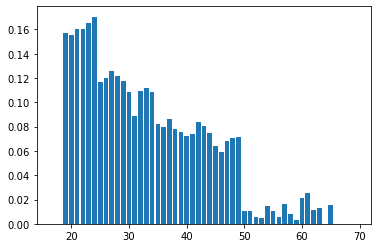

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(x_tent_age.T.index,x_tent_age.T[True]/(x_tent_age.T[False]+x_tent_age.T[True]));

> Conclusion: We see in the plot above that visitors in their mid-20s are more likely to purchase a Tent